<a href="https://colab.research.google.com/github/tejartejarte/machinelearning/blob/main/College_Attendance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

In [25]:
cet=pd.read_excel("/content/Attendance project.xlsx",skiprows=3)

In [26]:
cet.columns=[
    "RollNumber",
    "Branch",
    "Email",
    "Join_Time",
    "Leave_Time",
    "Duration",
    "Guest",
    "In_Waiting_Room"
]

In [27]:
cet.head()

,RollNumber,Branch,Email,Join_Time,Leave_Time,Duration,Guest,In_Waiting_Room
0,21H51A7201,AID,NaN,11/14/2024 01:16:40 PM,11/14/2024 01:30:07 PM,14,Yes,No
1,21H51A7201,AID,NaN,11/14/2024 01:30:08 PM,11/14/2024 02:24:36 PM,55,Yes,No
2,21H51A7201,AID,NaN,11/14/2024 02:37:47 PM,11/14/2024 04:03:00 PM,86,Yes,No
3,21H51A7202,AID,NaN,11/14/2024 12:59:00 PM,11/14/2024 01:04:18 PM,6,Yes,No
4,21H51A7202,AID,NaN,11/14/2024 01:03:54 PM,11/14/2024 04:02:55 PM,180,Yes,No


In [28]:
print(cet.isnull().sum())

RollNumber            0
Branch                0
Email              1034
Join_Time             0
Leave_Time            0
Duration              0
Guest                 0
In_Waiting_Room       0
dtype: int64


In [29]:
cet["Join_Time"]=pd.to_datetime(cet["Join_Time"],format="%m/%d/%Y %I:%M:%S %p")
cet["Leave_Time"]=pd.to_datetime(cet["Leave_Time"],format="%m/%d/%Y %I:%M:%S %p")

In [30]:
print(cet.head())

   RollNumber Branch  Email           Join_Time          Leave_Time  Duration  \
0  21H51A7201    AID    NaN 2024-11-14 13:16:40 2024-11-14 13:30:07        14   
1  21H51A7201    AID    NaN 2024-11-14 13:30:08 2024-11-14 14:24:36        55   
2  21H51A7201    AID    NaN 2024-11-14 14:37:47 2024-11-14 16:03:00        86   
3  21H51A7202    AID    NaN 2024-11-14 12:59:00 2024-11-14 13:04:18         6   
4  21H51A7202    AID    NaN 2024-11-14 13:03:54 2024-11-14 16:02:55       180   

  Guest In_Waiting_Room  
0   Yes              No  
1   Yes              No  
2   Yes              No  
3   Yes              No  
4   Yes              No  


In [31]:
cet=cet.drop(columns=['Email',"Guest","In_Waiting_Room"])

In [32]:
print(cet.head())

   RollNumber Branch           Join_Time          Leave_Time  Duration
0  21H51A7201    AID 2024-11-14 13:16:40 2024-11-14 13:30:07        14
1  21H51A7201    AID 2024-11-14 13:30:08 2024-11-14 14:24:36        55
2  21H51A7201    AID 2024-11-14 14:37:47 2024-11-14 16:03:00        86
3  21H51A7202    AID 2024-11-14 12:59:00 2024-11-14 13:04:18         6
4  21H51A7202    AID 2024-11-14 13:03:54 2024-11-14 16:02:55       180


In [43]:
cet["Duration"]=pd.to_numeric(cet["Duration"],errors="coerce")

total_duration=cet.groupby("RollNumber")["Duration"].sum().reset_index()
total_duration.columns=["RollNumber","Total_Duration"]

cet=pd.merge(cet,total_duration,on="RollNumber",how="left")

threshold=99
cet["Attendance_Status"]=cet["Total_Duration"].apply(lambda x: "Present" if x>= threshold else "Absent")

In [44]:
print(cet.head(10))

   RollNumber Branch           Join_Time          Leave_Time  Duration  \
0  21H51A7201    AID 2024-11-14 13:16:40 2024-11-14 13:30:07        14   
1  21H51A7201    AID 2024-11-14 13:30:08 2024-11-14 14:24:36        55   
2  21H51A7201    AID 2024-11-14 14:37:47 2024-11-14 16:03:00        86   
3  21H51A7202    AID 2024-11-14 12:59:00 2024-11-14 13:04:18         6   
4  21H51A7202    AID 2024-11-14 13:03:54 2024-11-14 16:02:55       180   
5  21H51A7203    AID 2024-11-14 13:00:21 2024-11-14 13:05:55         6   
6  21H51A7203    AID 2024-11-14 13:05:45 2024-11-14 13:18:58        14   
7  21H51A7203    AID 2024-11-14 13:19:36 2024-11-14 13:21:26         2   
8  21H51A7203    AID 2024-11-14 13:21:33 2024-11-14 13:45:07        24   
9  21H51A7203    AID 2024-11-14 13:45:07 2024-11-14 13:46:43         2   

   Total_Durationh  Total_Duration_x Attendance_Status  Total_Duration_y  \
0              155               155           Present               155   
1              155               

In [40]:
print(cet.columns)

Index(['RollNumber', 'Branch', 'Join_Time', 'Leave_Time', 'Duration',
       'Total_Durationh', 'Total_Duration', 'Attendance_Status'],
      dtype='object')


Total Attendance Summary


In [46]:

attendance_summary=cet.groupby("Attendance_Status").size()
print(attendance_summary)

Attendance_Status
Absent     184
Present    850
dtype: int64


Branch-Wise Attendance

In [47]:

branch_summary=cet.groupby(["Branch","Attendance_Status"]).size().unstack()
print(branch_summary)

Attendance_Status  Absent  Present
Branch                            
AID                    31       45
AIM                    22       91
CSC                    18      112
CSD                    10       47
CSE                    52      306
CSM                    32      183
IT                     19       66


Latecomers and Early Leavers:-

In [53]:

session_start=datetime.strptime("01:30:00 PM","%I:%M:%S %p")
session_end=datetime.strptime("03:40:00 PM","%I:%M:%S %p")

cet["Join_Time"]=pd.to_datetime(cet["Join_Time"])
cet["Leave_Time"]=pd.to_datetime(cet["Leave_Time"])

cet["Late_Join"]=cet["Join_Time"].apply(lambda x: x.time()> session_start.time())
cet["Early_Leave"]=cet["Leave_Time"].apply(lambda x: x.time()< session_end.time())

print(cet[["RollNumber","Join_Time","Leave_Time","Late_Join","Early_Leave"]])

                                             RollNumber           Join_Time  \
0                                            21H51A7201 2024-11-14 13:16:40   
1                                            21H51A7201 2024-11-14 13:30:08   
2                                            21H51A7201 2024-11-14 14:37:47   
3                                            21H51A7202 2024-11-14 12:59:00   
4                                            21H51A7202 2024-11-14 13:03:54   
...                                                 ...                 ...   
1029                                         22H55A1205 2024-11-14 13:28:00   
1030  22H55A1205 (22H55A1205-M PRASAD NAIDU B.Tech-I... 2024-11-14 13:03:12   
1031                                         22H55A1206 2024-11-14 13:03:12   
1032                                         22H55A1206 2024-11-14 14:38:51   
1033                                         22H55A1206 2024-11-14 15:09:19   

              Leave_Time  Late_Join  Early_Leave  


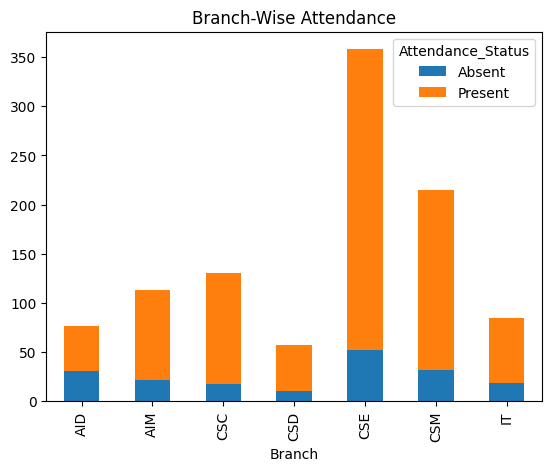

In [54]:

branch_summary.plot(kind="bar",stacked=True)
plt.title("Branch-Wise Attendance")
plt.show()